<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/TCB_02112023_LYD_Comment_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**:
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**:
Bert, transformer, SVM, PhoBERT

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: tcb
Nhập giới hạn comment: 1000


# **Crawl**

# **Crawl F319**

In [ ]:
# import requests
# import json
# import datetime
# uname = 'hieuldt'
# passw = 'MN9R6ZG7XAkFgqXF'
# params = {"username": uname,"password": passw}
# response = requests.post("https://astm.ai4u.io/auth/signin", data = params)
# token = response.json()['token']

In [ ]:
# # call api
# header = {"Authorization": "Bearer %s" %(token)}
# from_dt = datetime.datetime.strptime("2022-01-01 00:00:01",'%Y-%m-%d %H:%M:%S')
# to_dt = datetime.datetime.strptime("2022-12-30 00:00:01",'%Y-%m-%d %H:%M:%S')
# str_from = int(time.mktime(from_dt.timetuple())*1000)
# str_to = int(time.mktime(to_dt.timetuple())*1000)
# keywords = a
# feed_id = ''
# n_item_per_page = 200
# count = 0
# total_items = []
# n_total = None
# while(True):
#     api = "https://astm.ai4u.io/dashboard/comment/list?keyword=%s&from=%s&to=%s&limit=%d&offset=%d&feed_id=%s&sort=created_date:desc" \
#         %(keywords, str_from, str_to, n_item_per_page, count, feed_id)
#     api_response = requests.get(api, headers = header)
#     res = json.loads(api_response.text)
#     items = res['items']
#     n_fetch = res['size']
#     if n_total is None:
#         n_total = res['total']
#         print("Total hits: %d" %n_total)
#     for item in items:
#         total_items.append(item)
#     count += n_fetch
#     print("%d document(s) have been fetched" %count)
#     if count >= n_total:
#         print("Data Fetching is completed!")
#         break

In [ ]:
# import pandas as pd
# data = pd.DataFrame.from_dict(total_items)
# data['created_date'] = data['created_date']/1000
# data['created_date'] = pd.to_datetime(data['created_date'], unit='s')

# cols_to_drop = ['user_name','comment_id','feed_id']
# data = data.drop(cols_to_drop, axis=1)
# data['originalContent'] = data['content']
# data['date'] = data['created_date']
# data['date'] = data['date'].dt.strftime('%m/%d/%Y')
# cols_to_drop = ['created_date','content']
# data = data.drop(cols_to_drop, axis=1)

# **Sentiment Applied**

standardized data...
Processing step 1: Lower Case, Removed Https tag, Removed Stopwords
CPU times: user 3.09 ms, sys: 16 µs, total: 3.11 ms
Wall time: 3.06 ms
CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 12.7 ms
CPU times: user 2.5 ms, sys: 737 µs, total: 3.24 ms
Wall time: 3.18 ms
Done
2023-11-02 11:10:55,454 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmplw42ur9e


100%|██████████| 2234880/2234880 [00:00<00:00, 15831122.80B/s]

2023-11-02 11:10:56,048 copying /tmp/tmplw42ur9e to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2023-11-02 11:10:56,053 removing temp file /tmp/tmplw42ur9e


Processing step 3: Tokenize
Processing step 4: POS Tagging
Processing step 5: Entity Regconize
Processing step 6: Vectorize PhoBERT
Process model SVM....
>>> Done


# **Visualize Sentiment Analysis**

Ý nghĩa của biểu đồ: Biểu diễn số lượng bình luận tích cực / tiêu cực / trung tính theo khung thời gian.
* Positive Comment: Bình luận được máy nhận diện là tích cực
* Negative Comment: Bình luận được máy nhận diện là tiêu cực
* Neutral Comment: Bình luận được máy nhận diện là không có trạng thái cảm xúc (hoặc máy không nhận diện được)

<Axes: title={'center': 'Compair Positive - Negative - Neutral comment'}, xlabel='date', ylabel='Sentiment_neutral'>

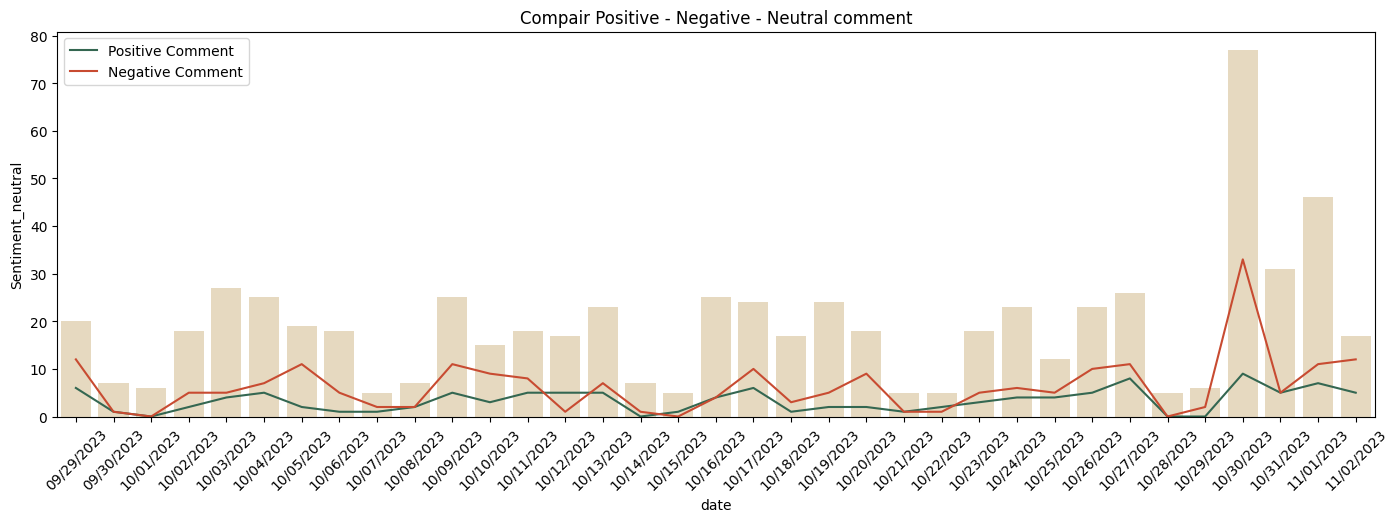

<Axes: title={'center': 'Compair Positive - Negative - Neutral comment Monthly'}, xlabel='date', ylabel='Sentiment_neutral'>

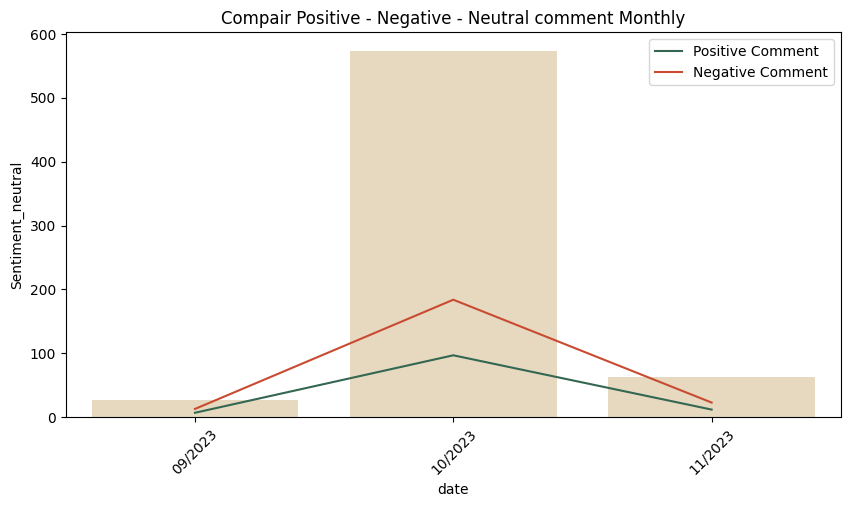

# **Visualize Topic Cluster**

Ý nghĩa biểu đồ: Phân loại comment theo 4 nhóm: Cơ bản / Kĩ thuật / Vĩ mô / Tin đồn. Và nhận diện cảm xúc (tích cực / tiêu cực) trên từng loại topic

Text(0.5, 1.0, 'Topic Tin đồn')

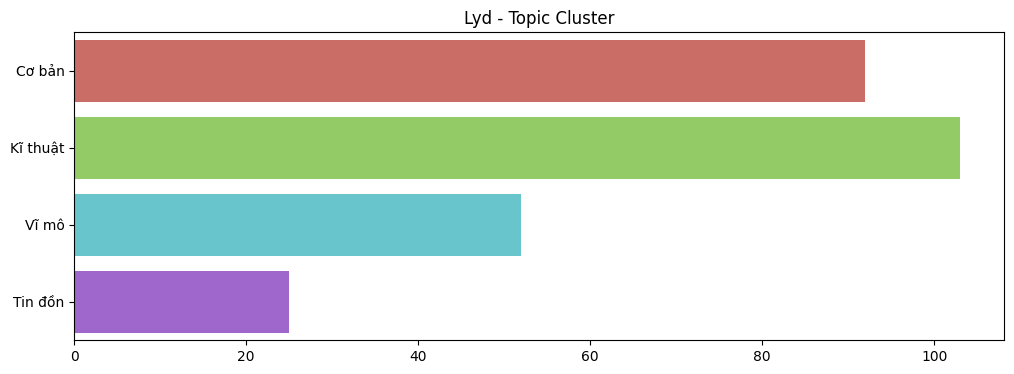

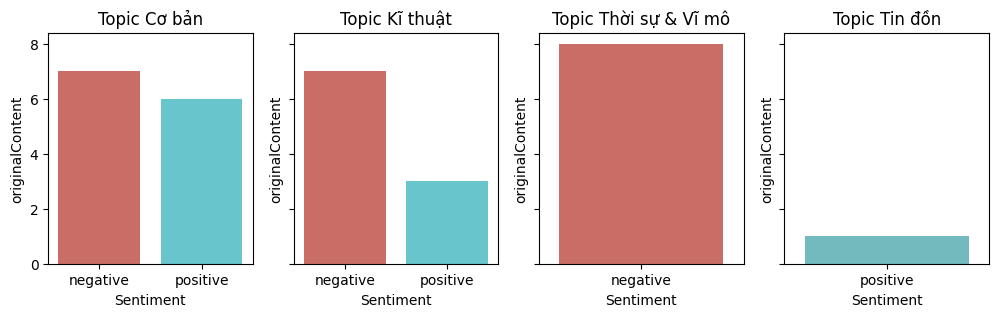

Số comment cơ bản =  92 . Số người tham gia comment =  92
Số comment kĩ thuật =  103 . Số người tham gia comment =  103
Số comment thời sự & vĩ mô =  52 . Số người tham gia comment =  52
Số comment tin đồn =  25 . Số người tham gia comment =  25


## **Text Summarization (tin đồn) using BERT**

## **Graph Knowledge tin_don**